In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
import matplotlib.pyplot as plt
dataset_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col=0)
dataset_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
dataset_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

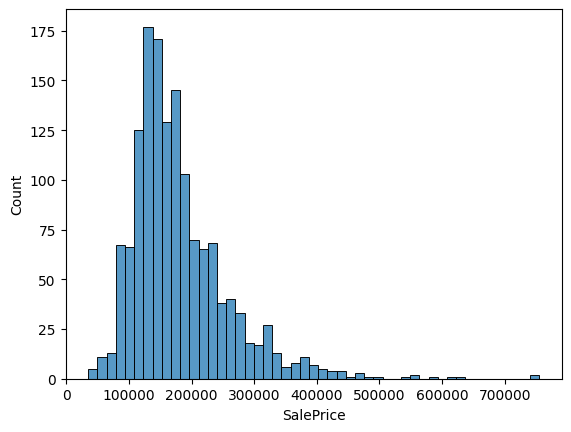

In [5]:
import seaborn as sns
print(dataset_train.SalePrice.describe())
sns.histplot(dataset_train.SalePrice)

In [6]:
comluns=['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
dataset_train.drop(comluns, axis=1 , inplace=True)

In [7]:
dataset_train['LotFrontage'].fillna(dataset_train["LotFrontage"].mean())
dataset_train['MasVnrArea'].fillna(dataset_train["MasVnrArea"].mean())

Id
1       196.0
2         0.0
3       162.0
4         0.0
5       350.0
        ...  
1456      0.0
1457    119.0
1458      0.0
1459      0.0
1460      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [8]:
dataset_train.isna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [10]:
dataset_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
nan_present = dataset_train.isnull().values.any()
nan_present

True

In [12]:
dataset_train=dataset_train.fillna(method="ffill")

/tmp/ipykernel_33/4232479003.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_train=dataset_train.fillna(method="ffill")


In [13]:
nan_present = dataset_train.isnull().values.any()
nan_present

False

In [14]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in dataset_train.columns:
    if dataset_train[i].dtype == 'object':
        dataset_train[i]=label_encoder.fit_transform(dataset_train[i])
dataset_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [16]:
corr_matrix = dataset_train.corr().abs()
corr_matrix.style.background_gradient(cmap='magma')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,0.343125,0.139781,0.024969,0.119289,0.002940,0.022844,0.075910,0.025672,0.005985,0.024762,0.042395,0.746063,0.397161,0.032628,0.059316,0.027850,0.040581,0.117817,0.031336,0.089159,0.137229,0.023039,0.017161,0.003254,0.058126,0.034838,0.007665,0.068193,0.014648,0.069836,0.041871,0.065649,0.140759,0.238518,0.048009,0.020760,0.101774,0.051945,0.251758,0.307886,0.046474,0.074853,0.003491,0.002333,0.131608,0.177354,0.023438,0.281721,0.010129,0.040380,0.003711,0.045569,0.105462,0.079045,0.003908,0.040110,0.098672,0.007282,0.003127,0.059925,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.012464,0.024940,0.084284
MSZoning,0.035900,1.000000,0.102703,0.034452,0.087654,0.061887,0.017854,0.001192,0.009895,0.022055,0.249679,0.027874,0.044606,0.005690,0.105315,0.160099,0.186951,0.308908,0.174728,0.000301,0.005133,0.008558,0.006963,0.062902,0.200536,0.096041,0.235174,0.125210,0.009709,0.033790,0.023326,0.049128,0.033811,0.028086,0.046749,0.087834,0.056866,0.134279,0.049523,0.070818,0.055614,0.051481,0.011520,0.082615,0.018526,0.007193,0.198290,0.133876,0.016471,0.049434,0.128976,0.043200,0.095722,0.011349,0.119342,0.249574,0.151625,0.157042,0.189250,0.148529,0.081175,0.100366,0.009477,0.154704,0.115509,0.000362,0.019089,0.003128,0.009293,0.031496,0.020628,0.097437,0.009494,0.166872
LotFrontage,0.343125,0.102703,1.000000,0.272696,0.029359,0.141024,0.063072,0.032831,0.179006,0.061125,0.076988,0.021339,0.005075,0.394865,0.033701,0.215195,0.058140,0.107828,0.069945,0.131703,0.061140,0.065915,0.086398,0.165727,0.156613,0.043743,0.087663,0.152159,0.049628,0.105240,0.015809,0.188568,0.025843,0.044697,0.114749,0.328055,0.020506,0.065023,0.065229,0.051333,0.373312,0.070897,0.031711,0.336470,0.081472,0.014783,0.168800,0.050319,0.226910,0.015800,0.172485,0.294840,0.030669,0.210444,0.200463,0.053036,0.157857,0.253898,0.295725,0.057820,0.028767,0.087917,0.044805,0.116196,0.005835,0.035757,0.039751,0.149435,0.006256,0.020600,0.006237,0.031823,0.036502,0.298490
LotArea,0.139781,0.034452,0.272696,1.000000,0.197131,0.165315,0.149083,0.010123,0.121161,0.436868,0.044569,0.023846,0.022164,0.205721,0.033190,0.105806,0.005636,0.014228,0.013788,0.077054,0.149837,0.004256,0.003930,0.103227,0.057275,0.015160,0.011081,0.062385,0.015095,0.138394,0.058418,0.214103,0.067771,0.111170,0.002618,0.260833,0.028158,0.004212,0.049755,0.043856,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.017784,0.057018,0.190015,0.022317,0.271364,0.126417,0.026193,0.100691,0.154871,0.180403,0.023319,0.029872,0.015134,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.012292,0.034169,0.263843
Street,0.024969,0.087654,0.029359,0.197131,1.000000,0.010224,0.115995,0.001682,0.013960,0.179360,0.011561,0.071657,0.002039,0.018243,0.023704,0.058823,0.042848,0.021137,0.065465,0.019732,0.008081,0.002505,0.006166,0.017236,0.049976,0.005874,0.035277,0.030173,0.018402,0.071289,0.015353,0.015643,0.060898,0.038487,0.035229,0.005068,0.007904,0.053995,0.069869,0.021324,0.005950,0.046983,0.007724,0.044121,0.050524,0.015485,0.046471,0.027628,0.028865,0.013583,0.025307,0.046828,0.016444,0.005348,0.00

In [17]:
dataset_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,70.104795,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,23.846996,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,59.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,70.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,80.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


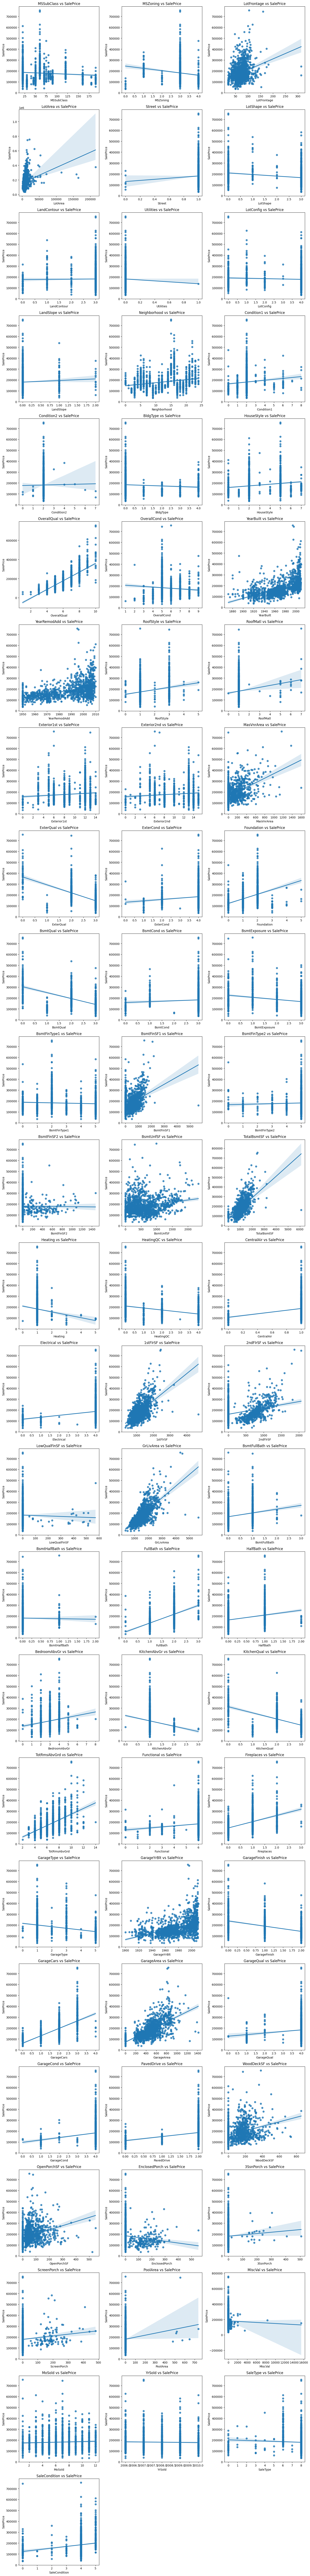

In [18]:
columns_to_plot = [col for col in dataset_train.columns if col != 'SalePrice']
num_cols = 3
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.regplot(data=dataset_train, x=col, y='SalePrice', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{col} vs SalePrice')
    
num_features = len(columns_to_plot)
for i in range(num_features, num_rows*num_cols):
    axes.flatten()[i].axis('off')
plt.tight_layout()
plt.show()

In [19]:
dt=dataset_train.copy()
x=dt
x=x.drop('SalePrice', axis=1)
y=dt['SalePrice']
x.head()
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [20]:
from sklearn.preprocessing import StandardScaler
sds_transform=StandardScaler()
x=sds_transform.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.01, random_state=50)

In [22]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train, y_train)
LR_model.score(x_test, y_test)

0.8085024748913906

In [23]:
y_pred_linear=LR_model.predict(x_test)


In [24]:
def plot_comparision(y_test,y_pred):
    y_pred_series = pd.Series(y_pred)
    y_test_reset = y_test.reset_index(drop=True)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reset, y_pred_series, color='blue', label='Predicted vs. Actual')
    plt.plot([min(y_test_reset), max(y_test_reset)], [min(y_test_reset), max(y_test_reset)], color='red', linestyle='--', label='Ideal line')
    for i in range(len(y_test_reset)):
        plt.text(y_test_reset[i], y_pred_series[i], f'{y_pred_series[i]:.2f}', fontsize=8, ha='center', va='bottom')
    plt.title('Comparison of Predicted vs. Actual Sale Prices')
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.legend()
    plt.show()


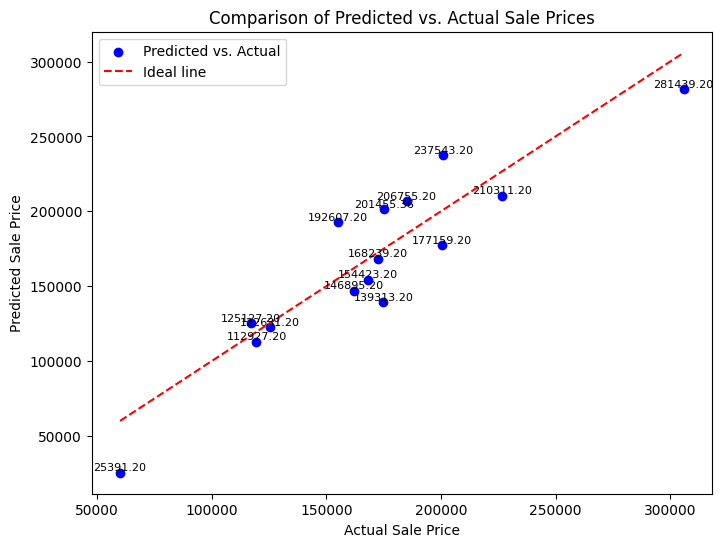

In [25]:
plot_comparision(y_test,y_pred_linear)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_linear = mean_absolute_error(y_pred_linear, y_test)
mse_linear = mean_squared_error(y_pred_linear, y_test)
print(f"MAE: {mae_linear:.2f}")
print(f"MSE: {np.sqrt(mse_linear):.2f}")

MAE: 20483.88
MSE: 23589.42
